In [72]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os,sys
import datetime
%matplotlib inline

plt.style.use('seaborn-poster')


knmipath = '/nobackup/users/killaars/PhD_data/benchmarkrun_2014/'
macbookpath = '/Users/killaars/PhD/2017_nudging_coupling_test/benchmarkrun_2014/'
path = macbookpath

fin_obs = []
time = []
obs_num = []
obs_id = []
obs_loc = []
lat = []
lon = []
alt = []
fmp_obs0 = []
fn1c3_obs = []
fn3c3_obs = []
fn6c3_obs = []
fndc3_obs = []
fn1c6_obs = []
fn6c6_obs = []
fndc6_obs = []
fnfc3_obs = []
for root, dirs, files in os.walk(os.path.join(path,'sample_flasks')):
    for file in sorted(files):
        if file.startswith('sample_coordinates_2014'):
            #print(file,file[19:])
            #print('flask_output_TM5_MP_'+file[19:])            
            #print('flask_output_ECE_'+file[19:])
            TM5_MP_filename = 'flask_output_TM5_MP_'+file[19:]
            ECE_filename = 'flask_output_ECE_'+file[19:]
            
            flask_in = os.path.join(path,'sample_flasks',file)
            flask_mp = os.path.join(path,'TM5_offline',TM5_MP_filename) 
            flask_n1c3 = os.path.join(path,'n1c3',ECE_filename)
            flask_n3c3 = os.path.join(path,'n3c3',ECE_filename)
            flask_n6c3 = os.path.join(path,'n6c3',ECE_filename)
            flask_ndc3 = os.path.join(path,'ndc3',ECE_filename) 
            flask_n1c6 = os.path.join(path,'n1c6',ECE_filename)
            flask_n6c6 = os.path.join(path,'n6c6',ECE_filename)
            flask_ndc6 = os.path.join(path,'ndc6',ECE_filename)
            flask_nfc3 = os.path.join(path,'nfc3',ECE_filename)

            flask_in_fh = nc.Dataset(flask_in,mode='r')
            flask_mp_fh = nc.Dataset(flask_mp,mode='r')
            flask_n1c3_fh = nc.Dataset(flask_n1c3,mode='r')
            flask_n3c3_fh = nc.Dataset(flask_n3c3,mode='r')
            flask_n6c3_fh = nc.Dataset(flask_n6c3,mode='r')
            flask_ndc3_fh = nc.Dataset(flask_ndc3,mode='r')
            flask_n1c6_fh = nc.Dataset(flask_n1c6,mode='r')
            flask_n6c6_fh = nc.Dataset(flask_n6c6,mode='r')
            flask_ndc6_fh = nc.Dataset(flask_ndc6,mode='r')
            flask_nfc3_fh = nc.Dataset(flask_nfc3,mode='r')
            
            x = 40000000
            fin_obs = np.append(fin_obs,flask_in_fh.variables['observed'][:x])
            fin_date = flask_in_fh.variables['date_components'][:x]
            obs_num = np.append(obs_num,flask_in_fh.variables['obs_num'][:x])
            obs_id = np.append(obs_id,nc.chartostring(flask_in_fh.variables['obs_id'][:])) 
            lat = np.append(lat,flask_in_fh.variables['latitude'][:x])
            lon = np.append(lon,flask_in_fh.variables['longitude'][:x])
            alt = np.append(alt,flask_in_fh.variables['altitude'][:x])
            fmp_obs0 = np.append(fmp_obs0,flask_mp_fh.variables['flask'][:x,0]) #Are 10 members. First check if it works with 1
            fn1c3_obs = np.append(fn1c3_obs,flask_n1c3_fh.variables['flask'][:x,0])
            fn3c3_obs = np.append(fn3c3_obs,flask_n3c3_fh.variables['flask'][:x,0])
            fn6c3_obs = np.append(fn6c3_obs,flask_n6c3_fh.variables['flask'][:x,0])
            fndc3_obs = np.append(fndc3_obs,flask_ndc3_fh.variables['flask'][:x,0])
            fn1c6_obs = np.append(fn1c6_obs,flask_n1c6_fh.variables['flask'][:x,0])
            fn6c6_obs = np.append(fn6c6_obs,flask_n6c6_fh.variables['flask'][:x,0])
            fndc6_obs = np.append(fndc6_obs,flask_ndc6_fh.variables['flask'][:x,0])
            fnfc3_obs = np.append(fnfc3_obs,flask_nfc3_fh.variables['flask'][:x,0])
            
            flask_in_fh.close()
            flask_mp_fh.close()
            flask_n1c3_fh.close()
            flask_n3c3_fh.close()
            flask_n6c3_fh.close()
            flask_ndc3_fh.close()
            flask_n1c6_fh.close()
            flask_n6c6_fh.close()
            flask_ndc6_fh.close()
            flask_nfc3_fh.close()

            #check if the shapes are similar, meaning that they have the same number of points
            #print(np.shape(fin_obs),np.shape(fmp_obs0),np.shape(fn1c3_obs))
            
            #Code to transform the date components of the input file to a pandas series of timestamps
            N = (len(fin_date))
            base = datetime.datetime(1900, 1, 1)
            time_intermediate = np.array([base + datetime.timedelta(hours=i) for i in range(N)])
            for i in range(N):
                dt = datetime.datetime(fin_date[i,0],fin_date[i,1],fin_date[i,2],fin_date[i,3],fin_date[i,4],fin_date[i,5])
                time_intermediate[i] = pd.Timestamp(dt)
            time = np.append(time,time_intermediate)    


temp_array=[]
for i in range(len(obs_id)):
    string = str(obs_id[i])
    obs_loc.append(string[51:54])
    if 'surface-flask' in string:
        temp_array.append('surface-flask')
    elif 'surface-insitu' in str(string):
        temp_array.append('surface-insitu')
    elif 'aircraft-insitu' in str(string):
        temp_array.append('aircraft-insitu')
    elif 'tower-insitu' in str(string):
        temp_array.append('tower-insitu')
    elif 'aircraft-pfp' in str(string):
        temp_array.append('aircraft-pfp')
    elif 'surface-pfp' in str(string):
        temp_array.append('surface-pfp')
    elif 'aircraft-flask' in str(string):
        temp_array.append('aircraft-flask')
    elif 'shipboard-flask' in str(string):
        temp_array.append('shipboard-flask')
obs_id=temp_array

df = pd.DataFrame({'A_fin_obs' : fin_obs*1000000,
                   'B_fmp_obs' : fmp_obs0*1000000,
                   'C_fn1c3_obs': fn1c3_obs*1000000,
                   'D_alt'     : alt,
                   'E_lat'     : lat,
                   'F_lon'     : lon,
                   'G_date'    : time,
                   'H_obs_id'  : obs_id,
                   'I_obs_loc' : obs_loc,
                   'T_fnfc3_obs': fnfc3_obs*1000000,
                   'U_fn1c6_obs': fn1c6_obs*1000000,
                   'V_fn6c6_obs': fn6c6_obs*1000000,
                   'W_fndc6_obs': fndc6_obs*1000000,
                   'X_fn6c3_obs': fn6c3_obs*1000000,
                   'Y_fndc3_obs': fndc3_obs*1000000,
                   'Z_fn3c3_obs': fn3c3_obs*1000000},index=obs_num)  

/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


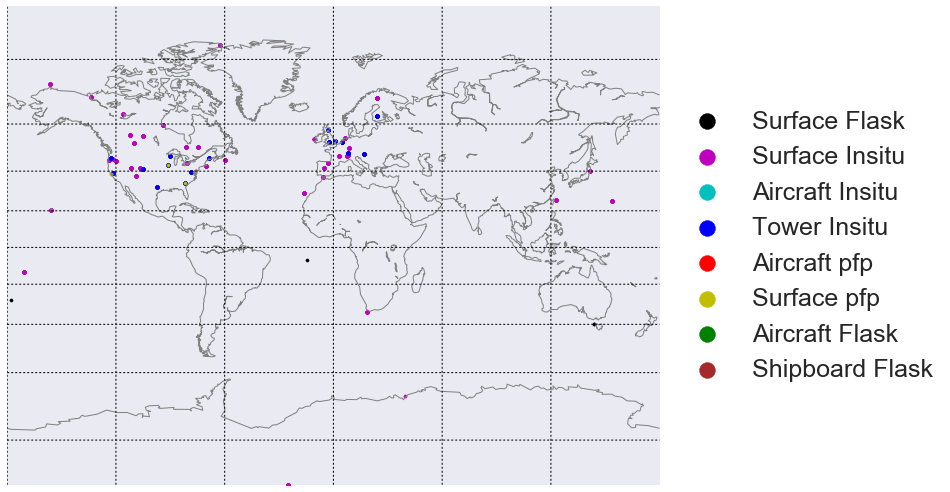

surface-insitu    947
tower-insitu      747
surface-flask       9
surface-pfp         4
Name: H_obs_id, dtype: int64


In [71]:
sur_fla = df[(df.H_obs_id == 'surface-flask')]
sur_fla_lon = sur_fla.F_lon.values
sur_fla_lat = sur_fla.E_lat.values
sur_ins = df[(df.H_obs_id == 'surface-insitu')]
sur_ins_lon = sur_ins.F_lon.values
sur_ins_lat = sur_ins.E_lat.values
air_ins = df[(df.H_obs_id == 'aircraft-insitu')]
air_ins_lon = air_ins.F_lon.values
air_ins_lat = air_ins.E_lat.values
tow_ins = df[(df.H_obs_id == 'tower-insitu')]
tow_ins_lon = tow_ins.F_lon.values
tow_ins_lat = tow_ins.E_lat.values
air_pfp = df[(df.H_obs_id == 'aircraft-pfp')]
air_pfp_lon = air_pfp.F_lon.values
air_pfp_lat = air_pfp.E_lat.values
sur_pfp = df[(df.H_obs_id == 'surface-pfp')]
sur_pfp_lon = sur_pfp.F_lon.values
sur_pfp_lat = sur_pfp.E_lat.values
air_fla = df[(df.H_obs_id == 'aircraft-flask')]
air_fla_lon = air_fla.F_lon.values
air_fla_lat = air_fla.E_lat.values
shi_fla = df[(df.H_obs_id == 'shipboard-flask')]
shi_fla_lon = shi_fla.F_lon.values
shi_fla_lat = shi_fla.E_lat.values

m = Basemap(projection='mill')
m.drawcoastlines(color='.5')

m.drawparallels(np.arange(-81,81,20))
m.drawmeridians(np.arange(-180,181,60))
x, y = m(sur_fla_lon,sur_fla_lat)
ms=10
m.scatter(x,y,ms,marker='o',color='k',label='Surface Flask')
x, y = m(sur_ins_lon,sur_ins_lat)
m.scatter(x,y,ms,marker='o',color='m',label='Surface Insitu')
x, y = m(air_ins_lon,air_ins_lat)
m.scatter(x,y,ms,marker='o',color='c',label='Aircraft Insitu')
x, y = m(tow_ins_lon,tow_ins_lat)
m.scatter(x,y,ms,marker='o',color='b',label='Tower Insitu')
x, y = m(air_pfp_lon,air_pfp_lat)
m.scatter(x,y,ms,marker='o',color='r',label='Aircraft pfp')
x, y = m(sur_pfp_lon,sur_pfp_lat)
m.scatter(x,y,ms,marker='o',color='y',label='Surface pfp')
x, y = m(air_fla_lon,air_fla_lat)
m.scatter(x,y,ms,marker='o',color='green',label='Aircraft Flask')
x, y = m(shi_fla_lon,shi_fla_lat)
m.scatter(x,y,ms,marker='o',color='brown',label='Shipboard Flask')
plt.title('',fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale = 5,fontsize='25')

plt.show()

print(df['H_obs_id'].value_counts())

/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3459: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3472: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/killaars/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:46: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/killaars/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See t

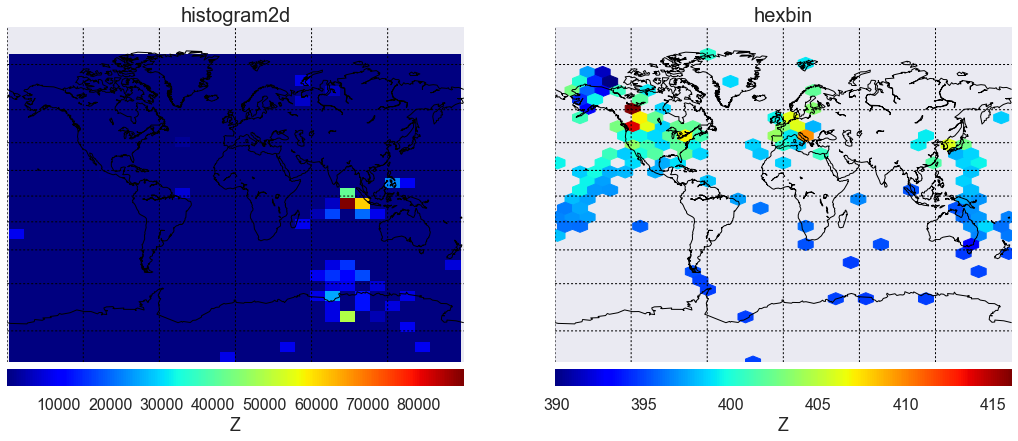

In [36]:
# example showing how to plot scattered data with hexbin.
from numpy.random import uniform
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import sys
# create north polar stereographic basemap
m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
#m = Basemap(lon_0=-105,lat_0=40,projection='ortho')

# number of points, bins to plot.
bins = 30


x,y = m(df['F_lon'].values, df['E_lat'].values)
z = df['A_fin_obs'].values

# print(x)
# print(y)
# print(z)
# sys.exit()

# make plot using hexbin
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(122)
CS = m.hexbin(x,y,C=z,gridsize=bins,cmap=plt.cm.jet)
# draw coastlines, lat/lon lines.
m.drawcoastlines()
m.drawparallels(np.arange(-81,81,20))
m.drawmeridians(np.arange(-180,181,60))
m.colorbar(location="bottom",label="Z") # draw colorbar
plt.title('hexbin', fontsize=20)


# use histogram2d instead of hexbin.
ax = fig.add_subplot(121)
# remove points outside projection limb.
bincount, xedges, yedges = np.histogram2d(x, y, bins=bins)
mask = bincount == 0
# reset zero values to one to avoid divide-by-zero
bincount = np.where(bincount == 0, 1, bincount)
H, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=z)
H = np.ma.masked_where(mask, H/bincount)
# set color of masked values to axes background (hexbin does this by default)
palette = plt.cm.jet
palette.set_bad(ax.get_axis_bgcolor(), 1.0)
CS = m.pcolormesh(xedges,yedges,bincount,shading='flat',cmap=palette)
# draw coastlines, lat/lon lines.
m.drawcoastlines()
m.drawparallels(np.arange(-81,81,20))
m.drawmeridians(np.arange(-180,181,60))
m.colorbar(location="bottom",label="Z") # draw colorbar
plt.title('histogram2d', fontsize=20)

plt.gcf().set_size_inches(18,10)
plt.show()